# Bias-Variance Tradeoff

Understanding how different sources of error lead to bias and variance helps us improve the data fitting process resulting in more accurate models.

**Error due to Bias**: The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

**Error due to Variance**: The error due to variance is taken as the variability of a model prediction for a given data point. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

### Bias-Variance error visualized:


<img src="./assets/Bias_Variance/graphical_visualization.png" width="450">

Source: [Understanding Bias and Variance](http://scott.fortmann-roe.com/docs/BiasVariance.html)

## Mathematical Definition

If we denote the variable we are trying to predict as $Y$ and our independent variable as $X$, the linear relationship relating one to the other such as $Y=f(X)+ϵ$ where the error term $ϵ$ is random noise.

<img src="./assets/Bias_Variance/error.png" width="200">

<img src="./assets/Bias_Variance/breakdown.png" width="300">

## Over-fitting and Under-fitting

> Your model is **underfitting** the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples($X$) and the target values ($Y$). Your model is **overfitting** your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

### Over-fitting: Causes and Remedies
If the model is over-fitting the trainind data, use these methods to decrease over-fitting.

* Increase the number of training samples.
* Decrease the complexity of the model.
* Increase the number of features or engineer more features.
* Use regularization.

#### **Regularization**:
> Regularization is adding a penalty term to the objective function and control the model complexity using that penalty term. Regularization is basically a technique to cope with over-fitting which comes up in training a model on sample data.

### Under-fitting: Causes and Remedies
Poor performance on the training data could be because the model is too simple (the input features are not expressive enough) to describe the target well. Performance can be improved by increasing model flexibility/complexity.

Model can be made complex by using these methods:
* Increase the number of features or engineer more features.
* Decrease the amount of regularization.

In [1]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

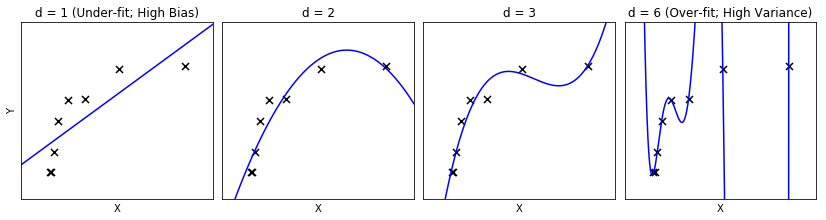

In [18]:
n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (Under-fit; High Bias)',
          'd = 2',
          'd = 3',
          'd = 6 (Over-fit; High Variance)']
degrees = [1, 2, 3, 6]

fig = plt.figure(figsize=(12, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(141 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('X')
    if i == 0:
        ax.set_ylabel('Y')

    ax.set_title(titles[i])

## Model Selection and Bias-Variance Trade-off

We can select the right complexity model in a data-driven way using **Cross-Validation**

## Cross-Validation

The error we are optimizing while training does not indicate how well the model has generalized the data or in other terms how well the model will perform on new unseen samples of the data. So while selecting model, we would like to slect the model which has lowest generalisation error. We can quantify generalization using an independent sample of data which is not a part of training samples. This independent sample is called **Validation Set**.

### Validation Set:

The $n$ available data points, ${(X_{1}, y_{1}), (X_{2}, y_{2}) .. (X_{n}, y_{n})}$ will be split this into training dataset $D_{T}$ and validation dataset $D_{v}$. 
* Use $D_{T}$ for training predictor models(Models with varying complexity).
* Use $D_{v}$ for selecting model which has lowest error on $D_{v}$.

### K-fold Cross-Validation:

* Create $K$ fold partition of the dataset.
* From the partitioned dataset, use $K-1$ folds for training and $1$ fold as validation set. Train $K$ predictor models.
* From the $K$ predictor models, select the one with lowest validation error.

### Repeated K-fold Cross-Validation:

* The $K$-fold cross-validation is repeated $n$ times so that each time we get a different split for the validation.
* Shuffling the dataset before splitting into $K$ folds is necessary as it produces different split everytime.